# Classify images of soda bottles 

In [1]:
from fastai.vision import *

## Download images from a list of URLs

In [2]:
# Path object for directory containing data
path = Path('data/brands')

# Create subdirectory for pepsi images
folder = 'pepsi'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
# Download and save pepsi images
file = 'urls_pepsi.csv'
download_images(path/file, dest, max_pics=200)

# Create subdirectory for coke images
folder = 'coke'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
dest = path/folder
# Download and save coke images
file = 'urls_coke.csv'
download_images(path/file, dest, max_pics=200)

In [6]:
classes = ['coke', 'pepsi']

Remove any images that can't be opened:

In [7]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

coke


pepsi


## View data

- Create `data` object of type `ImageDataBunch`.
- Use 20% of images for validation.
- Rescale images to be size 224px.
- Normalize images to match the imagenet dataset. (for transfer learning)


In [8]:
np.random.seed(42)
data = ImageDataBunch.from_folder(
    path,
    train=".",
    valid_pct=0.2,
    ds_tfms=get_transforms(),
    size=224,
    num_workers=4
).normalize(imagenet_stats)

Show an example of images & labels in our dataset.

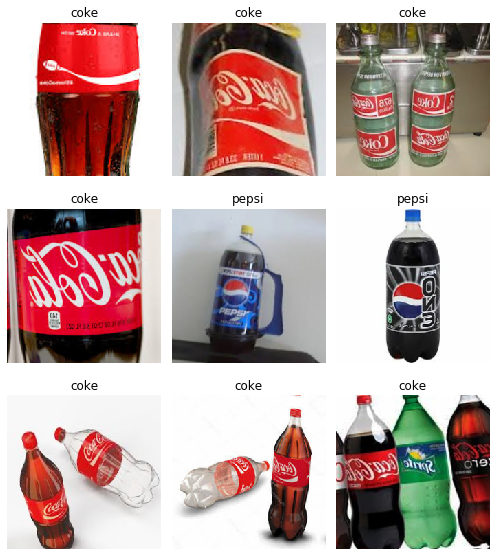

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
# Number of images in datasets: training and validation
len(data.train_ds), len(data.valid_ds)

(128, 32)

## Train model

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/enovid/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.155603,2.999508,0.500000,00:12
1,0.877259,1.656560,0.406250,00:15
2,0.705210,0.959553,0.250000,00:15
3,0.568373,0.910047,0.218750,00:19


In [14]:
learn.save('stage-1')

In [15]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


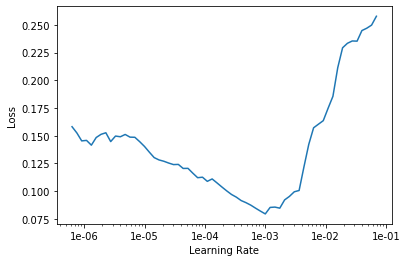

In [17]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(2, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.120994,1.384923,0.187500,00:24
1,0.108556,1.958387,0.250000,00:26


In [21]:
learn.save('stage-2')

## Interpretation

In [23]:
learn.load('stage-2');

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

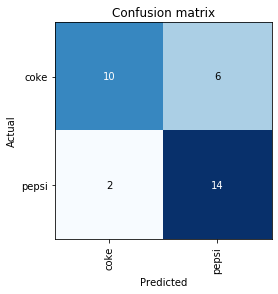

In [25]:
interp.plot_confusion_matrix()

## Cleaning up

In [3]:
from fastai.widgets import *

In [4]:
db = (ImageList.from_folder(path)
      .split_none()
      .label_from_folder()
      .transform(get_transforms(), size=224)
      .databunch()
      )

In [5]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2');

In [6]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [7]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())